In [18]:
#Import some packages for visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
fname = '../Data/dry_eye_disease_parsed.csv'
df0 = pd.read_csv(fname)

In [20]:
df = df0.copy()
# Print the info of the datasets
df.describe()

,age,sleep_duration,sleep_quality,stress_level,heart_rate,daily_steps,physical_activity,height,weight,average_screen_time,systolic,diastolic,bmi
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,31.422800,6.998245,2.997250,2.993750,79.912200,10536.900000,90.069750,174.865900,74.891850,5.519885,114.985450,74.999300,25.024844
std,8.103717,1.731723,1.412283,1.407235,11.808279,5752.729186,52.317283,14.719903,14.733839,2.606305,14.725589,8.975034,6.570457
min,18.000000,4.000000,1.000000,1.000000,60.000000,1000.000000,0.000000,150.000000,50.000000,1.000000,90.000000,60.000000,12.500000
25%,24.000000,5.500000,2.000000,2.000000,70.000000,6000.000000,45.000000,162.000000,62.000000,3.300000,102.000000,67.000000,20.060954
50%,31.000000,7.000000,3.000000,3.000000,80.000000,11000.000000,91.000000,175.000000,75.000000,5.500000,115.000000,75.000000,24.280264
75%,39.000000,8.500000,4.000000,4.000000,90.000000,16000.000000,135.000000,188.000000,88.000000,7.800000,128.000000,83.000000,29.296875
max,45.000000,10.000000,5.000000,5.000000,100.000000,20000.000000,180.000000,200.000000,100.000000,10.000000,140.000000,90.000000,44.444444


In [ ]:
%run '../Data/utils.py'
%run '../Data/features_list.py'

## Correlation among numerical features

In [22]:
corr_matrix0 = df.select_dtypes(include=['number']).corr()
corr_matrix0

,age,sleep_duration,sleep_quality,stress_level,heart_rate,daily_steps,physical_activity,height,weight,average_screen_time,systolic,diastolic,bmi
age,1.000000,0.004857,0.002513,0.008379,-0.001196,0.001302,-0.009191,-0.005171,0.003908,0.003177,0.018157,-0.016013,0.006266
sleep_duration,0.004857,1.000000,-0.006892,-0.006088,-0.029175,0.002823,0.001858,0.005259,0.000222,-0.004208,-0.000939,-0.000648,-0.001325
sleep_quality,0.002513,-0.006892,1.000000,0.000721,-0.014326,-0.003074,-0.010329,0.009380,0.005604,0.004697,0.007444,-0.006604,-0.002246
stress_level,0.008379,-0.006088,0.000721,1.000000,-0.008332,-0.005978,0.004272,-0.000651,-0.000611,-0.001344,0.003786,0.004450,-0.000573
heart_rate,-0.001196,-0.029175,-0.014326,-0.008332,1.000000,-0.001899,0.001334,-0.005229,-0.009639,0.002467,-0.005864,0.004728,-0.003666
daily_steps,0.001302,0.002823,-0.003074,-0.005978,-0.001899,1.000000,0.008413,-0.016801,-0.000619,-0.008670,-0.003174,-0.001200,0.011670
physical_activity,-0.009191,0.001858,-0.010329,0.004272,0.001334,0.008413,1.000000,-0.005989,0.016160,0.006469,-0.003794,0.006379,0.014376
height,-0.005171,0.005259,0.009380,-0.000651,-0.005229,-0.016801,-0.005989,1.000000,-0.000974,0.012817,-0.007917,0.001422,-0.644675
weight,0.003908,0.000222,0.005604,-0.000611,-0.009639,-0.000619,0.016160,-0.000974,1.000000,0.007798,0.003181,-0.003476,0.750834
average_screen_time,0.003177,-0.004208,0.004697,-0.001344,0.002467,-0.008670,0.006469,0.012817,0.007798,1.000000,-0.009392,-0.009701,-0.002333


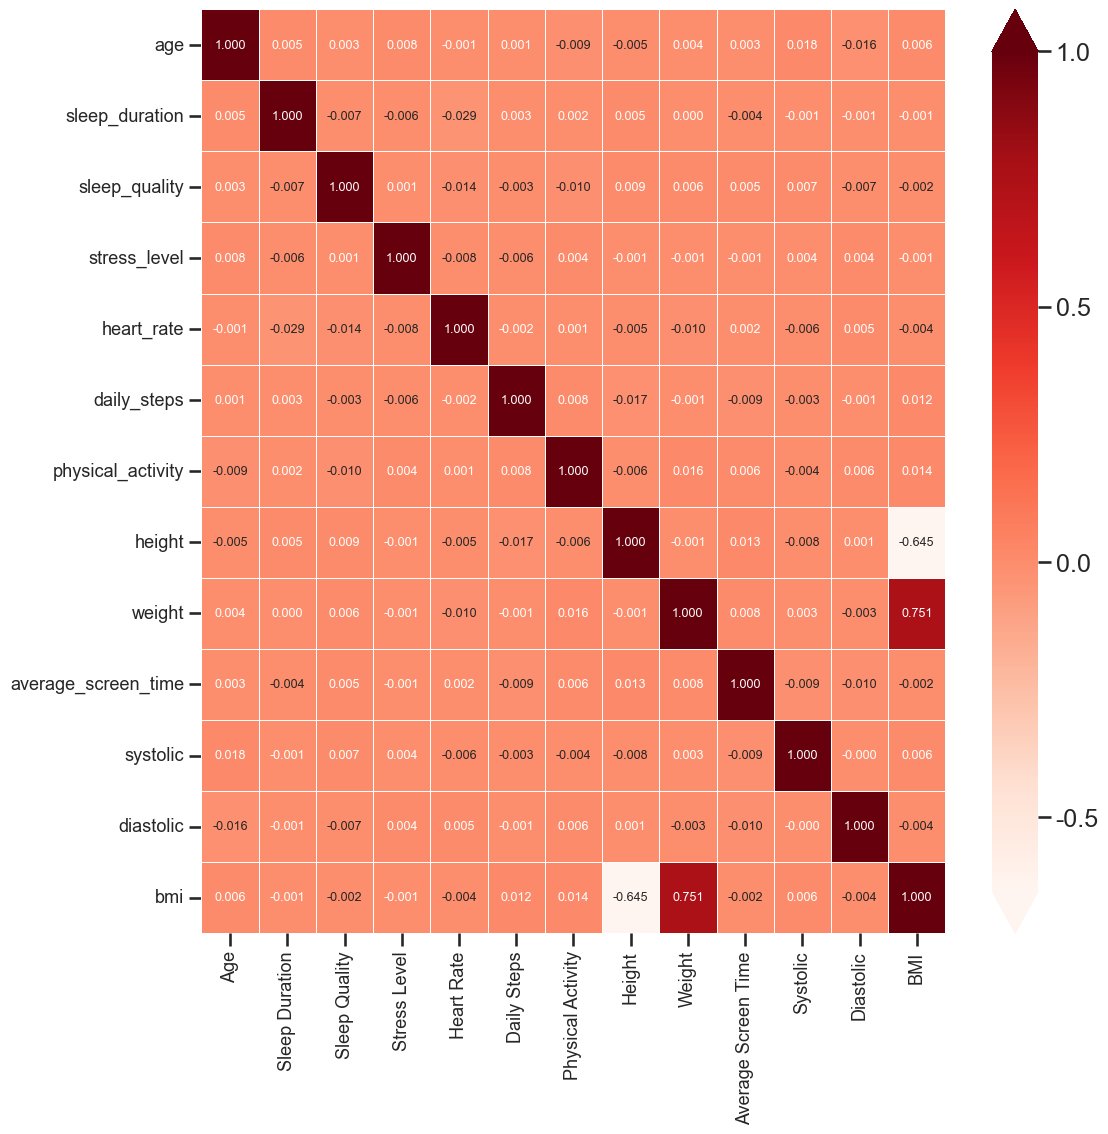

In [23]:
plt.figure(figsize=(12, 12))
ax = sns.heatmap(corr_matrix0, annot=True, cmap="Reds", fmt=".3f", linewidths=0.5,
            cbar_kws={'format': '%.1f', 'extend': 'both', 'ticks': [-1, -0.5, 0, 0.5, 1],
                      'norm': plt.matplotlib.colors.SymLogNorm(linthresh=0.01, vmin=-1, vmax=1)},
            annot_kws={'size': 9})  # Make annotation numbers smaller

# Customize tick labels
plt.xticks(fontsize=13)
plt.yticks(fontsize=13, rotation=0) # Keep y-axis labels horizontal

format_xticklabels(ax)
format_yticklabels(ax)

## Detect outliers in numerical data using IQR

In [24]:
def detect_outliers_iqr(df):
    outlier_info = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        percent_outliers = 100 * len(outliers) / len(df)
        outlier_info[col] = {
            "num_outliers": len(outliers),
            "percent_outliers": round(percent_outliers, 2),
        }
    return pd.DataFrame(outlier_info).T

# Get outlier stats
outlier_stats = detect_outliers_iqr(df)
print(outlier_stats)

                     num_outliers  percent_outliers
age                           0.0              0.00
sleep_duration                0.0              0.00
sleep_quality                 0.0              0.00
stress_level                  0.0              0.00
heart_rate                    0.0              0.00
daily_steps                   0.0              0.00
physical_activity             0.0              0.00
height                        0.0              0.00
weight                        0.0              0.00
average_screen_time           0.0              0.00
systolic                      0.0              0.00
diastolic                     0.0              0.00
bmi                          50.0              0.25


## Box plot of neumerical features

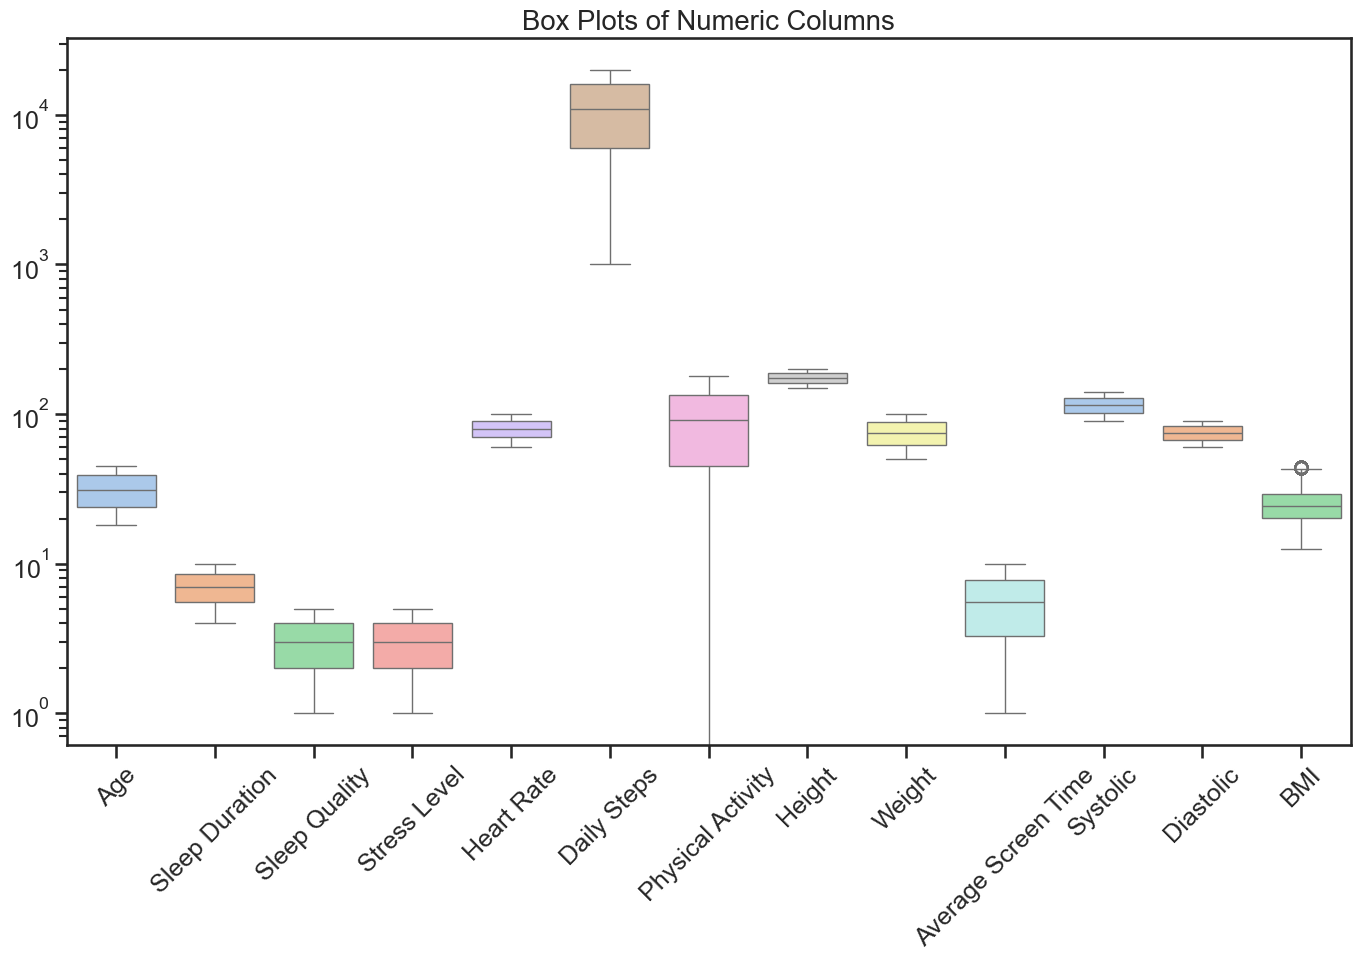

<Figure size 640x480 with 0 Axes>

In [25]:
plt.figure(figsize=(14, 10))
#df.select_dtypes(include=[np.number]).boxplot()
ax = sns.boxplot(data=df.select_dtypes(include=[np.number]), palette='pastel')
plt.yscale('log')
plt.title("Box Plots of Numeric Columns")
format_xticklabels(ax)  # Apply the formatting function
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.clf()